# Bike sharing analysis to demonstrate jupyter data science workflow

### From exploratory analysis to reproducible science

Credit : Jake Vanderplas

<span style='color:Blue'>  
You Said It!
"Bicycling is a big part of the future. It has to be. There's something wrong with a society that drives a car to workout in a gym."
--Bill Nye
</span>    

## Data

The data we will use here are the hourly bicycle counts on Seattle's Fremont Bridge. These data come from an automated bicycle counter, installed in late 2012, which has inductive sensors under the sidewalks on either side of the bridge. The daily or hourly bicycle counts can be downloaded from http://data.seattle.gov/; here is the direct link to the hourly dataset. 

In [25]:
import pandas as pd
import numpy as np 

In [1]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

from urllib.request import urlretrieve
urlretrieve(URL, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x1110bbe90>)

In [2]:
#!head Fremont.csv

In [3]:
import pandas as pd
data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


<AxesSubplot:xlabel='Date'>

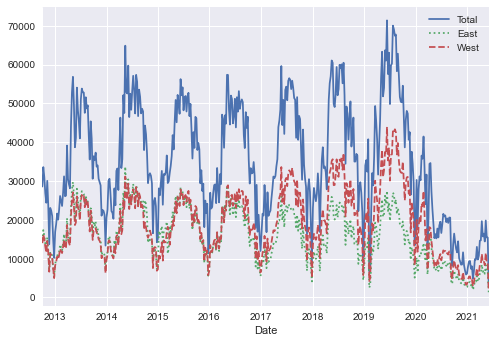

In [8]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

data.columns = ['Total', 'East', 'West']
data.resample('W').sum().plot(style=['-', ':', '--'])

(0.0, 2526518.55)

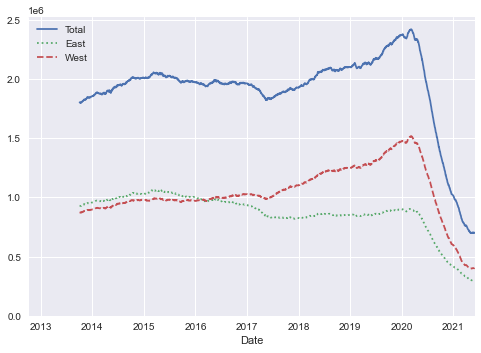

In [21]:
ax = data.resample('D').sum().rolling(365).sum().plot(style=['-', ':', '--'])
ax.set_ylim(0, None)

While these smoothed data views are useful to get an idea of the general trend in the data, they hide much of the interesting structure. For example, we might want to look at the average traffic as a function of the time of day.

<AxesSubplot:xlabel='time'>

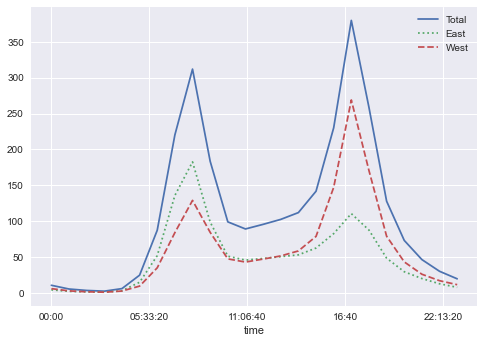

In [23]:
data.groupby(data.index.time).mean().plot(style=['-', ':', '--'])

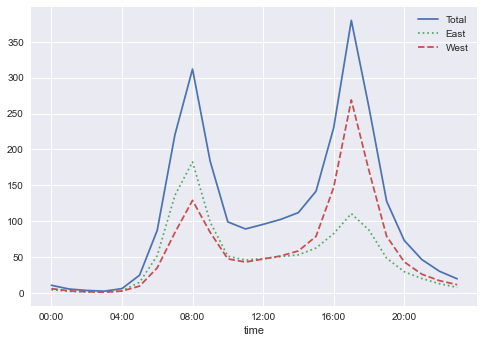

In [26]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=['-', ':', '--']);

In [31]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


<AxesSubplot:xlabel='time'>

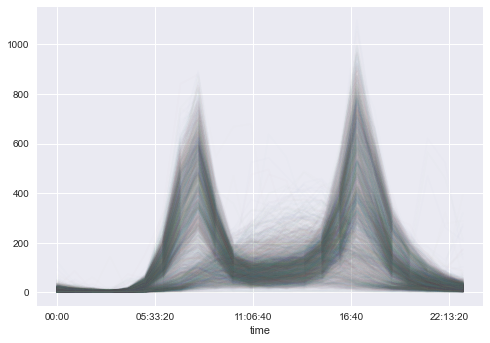

In [33]:
pivoted.plot(legend=False, alpha=0.01)